In [15]:
import numpy as np
import pygimli as pg 
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt
import matplotlib.pyplot as plt

In [16]:
data = tt.load("refraccion_curso/refraccion_1/picks/refraccion_1_picks.sgt")

In [17]:
print(data)

Data: Sensors: 33 data: 216, nonzero entries: ['g', 's', 't', 'valid']


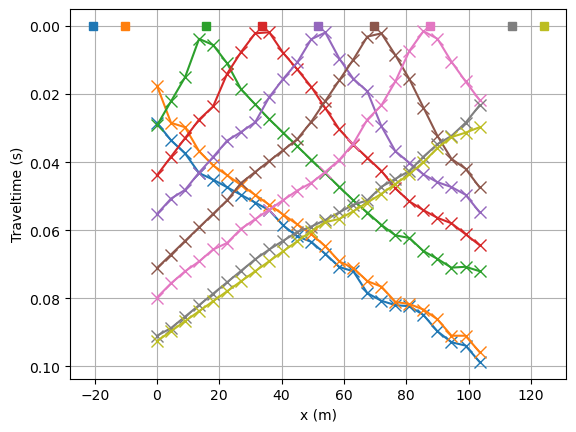

In [18]:
tt.show(data)

<Axes: ylabel='Count'>

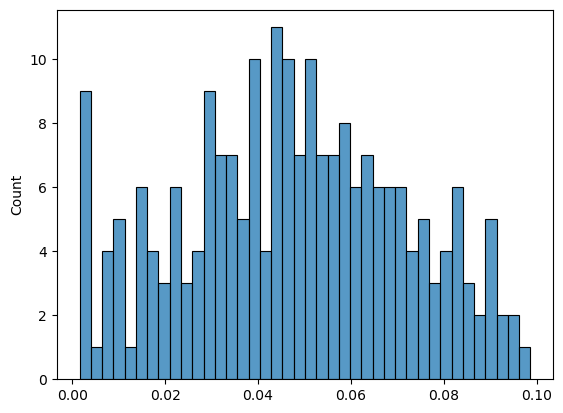

In [19]:
import seaborn as sns
sns.histplot(data['t'], bins = 40)

In [29]:
mgr = tt.TravelTimeManager(data)

(<Axes: >, None)

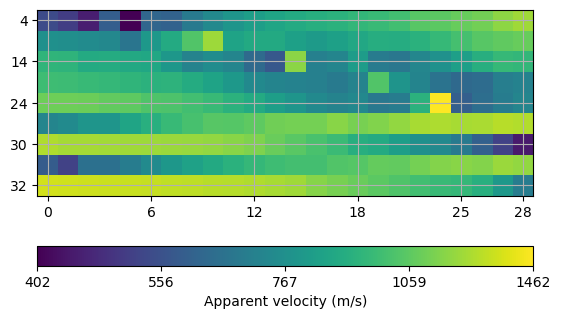

In [21]:
mgr.showData()

In [30]:
inv_1 = mgr.invert(verbose=True)

16/02/24 - 19:51:16 - pyGIMLi - INFO - Found 1 regions.
16/02/24 - 19:51:16 - pyGIMLi - INFO - Found 1 regions.


16/02/24 - 19:51:16 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(d:\Anaconda\envs\pg\lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
16/02/24 - 19:51:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/02/24 - 19:51:16 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
16/02/24 - 19:51:16 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
16/02/24 - 19:51:16 - pyGIMLi - INFO - Created startmodel from forward operator: 441, min/max=0.000200/0.002000
16/02/24 - 19:51:16 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001C17CD0F860>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001C17CD0F900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C17CD0F680>
min/max (data): 0.0015/0.1
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   81.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.33 (dPhi = 92.57%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.90 (dPhi = 56.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.27 (dPhi = 25.77%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.95 (dPhi = 13.07%) lam: 20

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c1758b9880>)

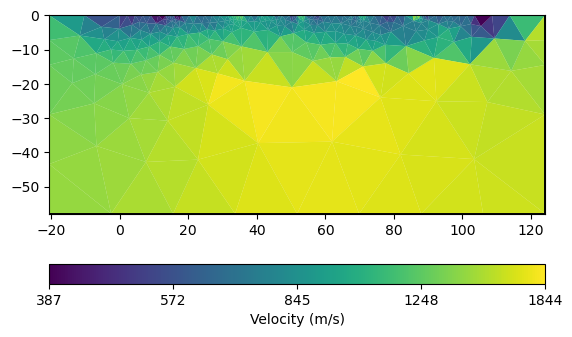

In [23]:
mgr.showResult()

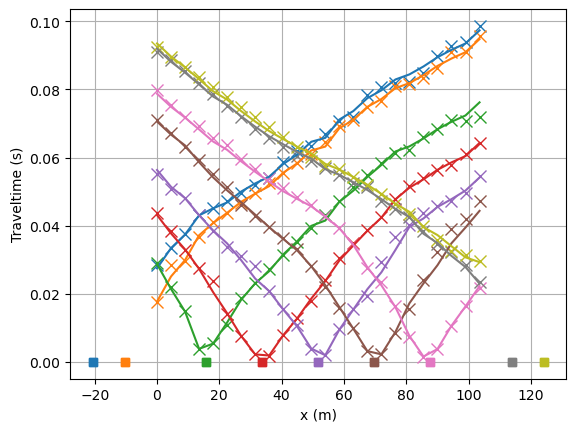

In [24]:
mgr.showFit()

<Axes: ylabel='Count'>

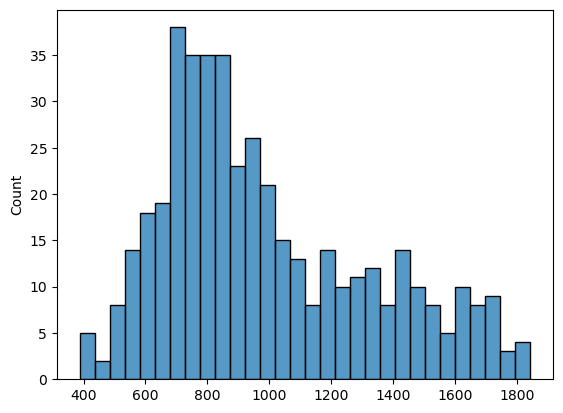

In [26]:
sns.histplot(inv_1, bins=30)

In [27]:
mgr2 = tt.TravelTimeManager(data)

In [28]:
inv = mgr2.invert(secNodes = 3, paraMaxCellSize = 5.0, zWeight = 2, verbose=True)

16/02/24 - 19:49:28 - pyGIMLi - INFO - Found 1 regions.
16/02/24 - 19:49:28 - pyGIMLi - INFO - Found 1 regions.
16/02/24 - 19:49:28 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(d:\Anaconda\envs\pg\lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
16/02/24 - 19:49:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/02/24 - 19:49:28 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
16/02/24 - 19:49:28 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
16/02/24 - 19:49:28 - pyGIMLi - INFO - Created startmodel from forward operator: 2860, min/max=0.000200/0.002000
16/02/24 - 19:49:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001C17CCF0C20>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001C17CCF0770>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001C17CD1C400>
min/max (data): 0.0015/0.1
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   78.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.02 (dPhi = 91.63%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.32 (dPhi = 53.23%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.15 (dPhi = 7.96%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.05 (dPhi

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c190ab4850>)

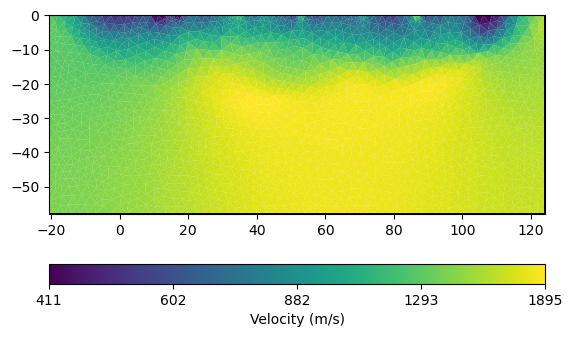

In [31]:
mgr2.showResult()

In [47]:
world = mt.createWorld(start=[-20.60, 0], end=[124.10, -58], layers=[-20], worldMarker=False)

(<Axes: >, None)

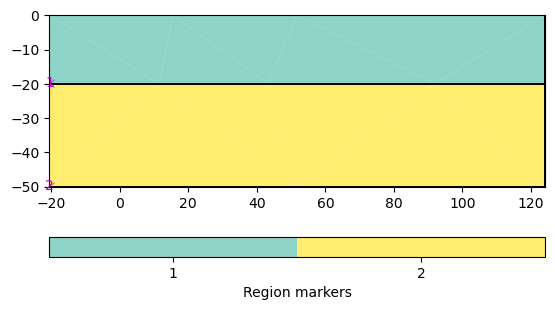

In [36]:
pg.show(world)

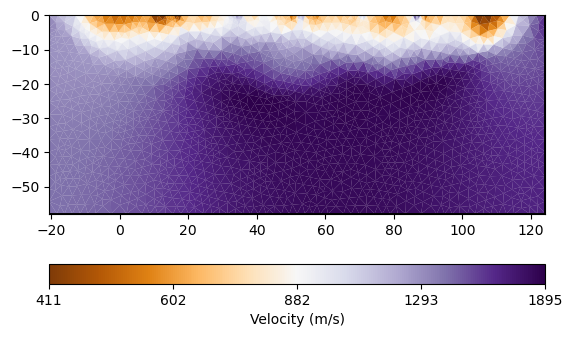

In [49]:
ax, _ = mgr2.showResult(cMap = 'PuOr')
ax, _ = pg.show(ax = ax, fillRegion=False)

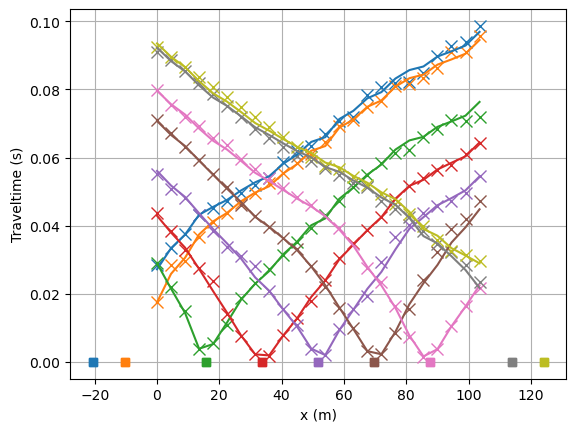

In [32]:
mgr2.showFit()

<Axes: ylabel='Count'>

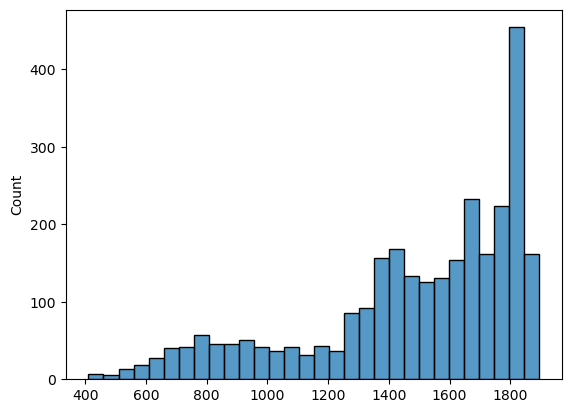

In [34]:
sns.histplot(inv, bins=30)